<a href="https://colab.research.google.com/github/haoudar/gatsby-starter-tutorial/blob/master/HASARD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional, TimeDistributed, RepeatVector, Flatten
from keras.callbacks import EarlyStopping
from keras import layers
from io import StringIO
import os

data = StringIO(
    """
9thMay2023 18 19 31 33 35 40 50 16
5thMay2023 8 16 22 24 25 30 32 11
2ndMay2023 2 12 22 30 32 35 36 1
25thApril2023 4 19 21 33 37 38 39 42
21thApril2023 7 8 18 26 33 42 46 39
18thApril2023 5 7 16 20 26 30 36 44
14thApril2023 17 25 28 30 34 46 49 42
11thApril2023 4 5 11 12 31 43 44 15
7thApril2023 15 26 34 41 44 45 46 11
4thApril2023 6 15 29 32 36 45 48 39
31thMarch2023 1 3 26 28 36 47 50 48
28thMarch2023 5 9 12 19 21 22 49 31
24thMarch2023 5 9 14 23 32 33 46 26
21thMarch2023 7 15 17 20 32 40 50 21
17thMarch2023 5 15 17 22 25 37 46 13
14thMarch2023 4 15 17 24 27 32 41 36
10thMarch2023 18 19 31 36 38 41 43 8
7thMarsh2023 1 16 26 28 31 44 45 22
3rdMarsh2023 10 14 20 37 42 44 46 50
28thFebruary2023 1 3 8 24 35 42 43 18
24thFebruary2023 1 11 15 21 35 48 49 3
21thFebruary2023 2 14 26 31 35 39 49 32
17thFebruary2023 10 12 23 26 39 41 45 42
14thFebruary2023 9 15 21 28 31 36 38 12
10thFebruary2023 6 16 22 23 28 29 34 8
7thFebruary2023 1 13 26 30 37 42 50 10
3rdFebruary2023 7 10 15 17 25 39 45 43
31thJanuary2023 2 6 16 23 40 41 48 31
27thJanuary2023 4 5 9 13 29 30 35 20
24thJanuary2023 10 20 25 29 35 42 45 3
20thJanuary2023 9 16 17 19 30 38 49 45
17thJanuary2023 1 2 5 6 16 30 45 19
13thJanuary2023 3 16 17 23 35 37 47 36
10thJaunuary2023 10 16 18 33 34 37 45 36
6thJanuary2023 7 14 20 24 35 40 50 15
3rdJanuary2023 9 25 32 34 37 46 50 18
30thDecember2022 6 26 32 37 38 39 46 7
27thDecember2022 5 6 13 16 31 32 35 36
23thDecember2022 7 17 20 22 31 36 48 34
20thDecember2022 3 8 9 20 22 36 50 25
16thDecember2022 6 22 25 42 43 45 48 47
13thDecember2022 12 13 14 31 35 39 50 48
9thDecember2022 2 18 20 22 34 43 48 7
6thDecember2022 1 2 3 14 17 19 41 30
2ndDecember2022 4 9 14 18 24 30 45 3
27thNovember2022 1 7 8 19 32 38 39 49
25thNovember2022 3 6 7 10 25 30 37 9
22ndNovember2022 2 10 12 18 19 21 34 33
18thNovember2022 3 5 11 17 26 42 49 27
15thNovember2022 9 12 13 22 25 35 47 24
11thNovember2022 5 23 34 35 46 47 50 10
8thNovember2022 4 7 14 18 26 40 42 12
4thNovember2022 4 8 25 27 32 33 34 16
1stNovember2022 2 23 27 34 43 46 49 44
28thOctober2022 12 17 29 30 38 40 50 16
25thOctober2022 3 6 19 23 26 28 43 46
21stOctober2022 1 9 25 35 41 43 50 40
18thOctober2022 12 14 23 25 39 40 44 24
14thOctober2022 2 24 27 31 40 43 46 13
11thOctober2022 3 19 33 36 39 40 42 44
7thOctober2022 7 23 28 31 32 39 40 2
4thOctober2022 10 18 21 22 37 40 46 25
30thSeptember2022 9 14 36 37 38 40 48 26
27thSeptember2022 10 12 13 26 29 39 46 23
23rdSeptember2022 15 17 21 24 28 32 43 27
20thSeptember2022 9 10 11 20 24 31 48 36
16thSeptember2022 2 13 24 34 39 40 46 23
13thSeptember2022 9 10 14 32 35 36 46 47
9thSeptember2022 1 2 15 18 29 32 36 9
6thSeptember2022 16 22 28 30 41 46 47 10
2ndSeptember2022 8 17 21 31 34 37 39 7
30thAugust2022 5 8 12 23 39 41 48 50
26thAugust2022 3 11 22 26 29 46 48 28
23rdAugust2022 9 13 14 19 37 43 50 4
19thAugust2022 5 20 26 33 35 46 48 17
16thAugust2022 1 2 9 21 32 33 43 36
12thAugust2022 4 10 28 36 40 44 47 19
9thAugust2022 16 19 25 26 27 33 45 38
5thAugust2022 7 16 19 33 36 48 49 5
2ndAugust2022 4 5 15 18 22 28 32 19
29thJuly2022 7 14 17 18 19 23 41 16
26thJuly2022 3 8 9 15 21 27 31 33
22ndJuly2022 1 9 19 34 37 39 49 6
19thJuly2022 6 9 17 19 31 34 46 4
15thJuly2022 4 7 12 18 29 47 49 48
12thJuly2022 8 11 15 16 26 29 40 37
8thJuly2022 7 12 14 18 46 47 49 19
5thJuly2022 12 29 33 35 38 41 46 13
1stJuly2022 1 11 13 14 25 36 47 50
28thJune2022 8 19 22 41 42 46 47 10
24thJune2022 3 9 17 19 20 44 50 28
21stJune2022 2 4 5 22 32 40 50 43
17thJune2022 1 10 12 21 30 39 40 38
14thJune2022 11 17 18 25 36 41 50 34
10thJune2022 8 14 16 17 19 22 24 23
7thJune2022 6 13 17 20 28 36 44 31
3rdJune2022 2 16 17 21 38 43 45 42
31stMay2022 6 13 23 27 35 44 50 37
27thMay2022 4 9 21 22 27 31 34 5
24thMay2022 12 26 30 31 35 39 45 22
20thMay2022 5 6 20 29 42 44 47 14
17thMay2022 10 35 38 40 45 47 48 23
13thMay2022 2 22 37 38 39 42 47 30
10thMay2022 6 15 18 19 20 27 28 24
6thMay2022 3 6 11 18 19 28 41 26
3rdMay2022 6 11 22 24 27 29 33 31
29thApril2022 8 9 19 32 37 46 48 45
26thApril2022 3 10 15 31 35 38 42 22
22ndApril2022 13 14 23 30 34 36 42 33
19thApril2022 1 6 10 27 42 45 50 43
15thApril2022 1 6 18 21 30 32 37 35
12thApril2022 3 5 7 19 32 34 50 25
8thApril2022 1 2 14 15 21 26 29 4
5thApril2022 14 24 34 39 43 48 50 20
1stApril2022 7 10 18 29 38 43 50 41
29thMarch2022 7 17 32 34 39 45 47 42
25thMarch2022 3 7 16 18 27 32 37 17
22ndMarch2022 14 16 20 26 33 36 48 1
18thMarch2022 5 7 12 18 26 29 46 25
15thMarch2022 3 7 12 17 23 38 40 27
11thMarch2022 5 7 12 22 28 43 47 1
8thMarch2022 10 12 13 18 25 26 37 39
4thMarch2022 2 4 14 18 24 46 47 23
1stMarch2022 5 6 28 36 40 46 50 27
25thFebruary2022 2 4 17 28 35 44 46 5
22ndFebruary2022 3 13 26 27 28 36 45 50
18thFebruary2022 2 3 8 11 12 37 49 36
15thFebruary2022 19 26 28 36 40 42 48 6
11thFebruary2022 1 10 12 30 33 34 36 4
8thFebruary2022 16 29 32 34 38 39 47 18
4thFebruary2022 5 15 19 22 37 46 47 1
1stFebruary2022 9 14 24 26 29 39 49 42
28thJanuary2022 3 7 8 10 34 43 47 16
25thJanuary2022 11 13 18 20 23 30 40 37
21stJanuary2022 10 14 21 26 28 36 50 41
18thJanuary2022 2 15 25 28 30 35 38 31
14thJanuary2022 2 4 7 10 14 21 34 26
11thJanuary2022 1 3 24 25 27 36 47 12
7thJanuary2022 4 5 31 39 42 45 50 11
4thJanuary2022 7 8 13 20 25 26 48 36
31stDecember2021 7 25 30 35 38 40 49 27
28thDecember2021 11 12 21 27 32 43 49 15
24thDecember2021 3 11 24 25 29 32 42 16
21stDecember2021 13 23 26 27 28 38 47 36
17thDecember2021 9 14 16 33 39 46 49 38
14thDecember2021 3 21 22 26 28 44 49 34
10thDecember2021 17 21 27 32 45 46 49 19
7thDecember2021 9 16 19 24 27 34 40 7
3rdDecember2021 7 18 22 35 37 43 45 44
30thNovember2021 4 7 8 22 24 30 49 42
26thNovember2021 9 26 30 35 37 42 50 47
23rdNovember2021 14 17 25 27 31 32 34 20
19thNovember2021 1 13 14 17 25 28 41 43
16thNovember2021 5 6 7 17 26 29 42 38
12thNovember2021 4 6 7 10 17 27 44 40
9thNovember2021 2 8 16 17 19 26 42 41
5thNovember2021 2 10 11 17 19 32 42 41
2ndNovember2021 7 13 18 30 33 37 41 6
29thOctober2021 1 5 17 18 38 41 48 13
26thOctober2021 2 8 10 14 21 36 40 17
22ndOctober2021 2 11 19 33 44 45 47 42
19thOctober2021 12 26 28 32 41 43 50 49
15thOctober2021 14 17 20 24 25 38 48 11
12thOctober2021 7 11 13 30 38 40 43 45
8thOctober2021 5 16 19 21 23 31 36 46
5thOctober2021 2 10 18 19 25 42 48 21
1stOctober2021 4 8 15 39 40 42 48 5
28thSeptember2021 2 5 8 18 23 31 35 43
24thSeptember2021 5 13 28 35 41 49 50 34
21stSeptember2021 4 8 11 14 15 34 45 7
17thSeptember2021 3 6 10 26 29 35 45 30
14thSeptember2021 17 24 27 33 38 41 48 39
10thSeptember2021 11 28 38 40 43 45 48 33
7thSeptember2021 5 8 31 36 41 42 43 39
3rdSeptember2021 1 2 4 10 27 33 45 31
31stAugust2021 3 11 23 26 31 42 50 24
27thAugust2021 9 10 13 25 41 47 49 36
24thAugust2021 1 24 26 29 30 45 50 5
20thAugust2021 2 6 21 31 34 39 45 33
17thAugust2021 5 16 18 33 37 38 39 35
13thAugust2021 1 14 17 20 28 32 38 6
10thAugust2021 14 18 19 32 35 38 41 27
6thAugust2021 14 15 24 43 44 48 49 47
3rdAugust2021 4 5 9 15 24 36 48 50
30thJuly2021 4 12 18 19 22 25 44 43
27thJuly2021 5 12 13 32 36 40 48 49
23rdJuly2021 7 8 13 21 35 38 45 15
20thJuly2021 2 13 15 19 38 39 46 34
16thJuly2021 13 17 24 26 33 46 48 27
13thJuly2021 2 6 12 13 17 36 48 25
9thJuly2021 11 21 32 33 38 40 44 19
6thJuly2021 10 14 25 26 38 41 50 49
2ndJuly2021 6 14 35 37 40 43 46 19
29thJune2021 6 17 22 23 32 37 47 13
25thJune2021 10 13 18 33 36 45 47 22
22ndJune2021 7 11 22 28 33 44 49 10
18thJune2021 11 14 15 24 34 43 47 36
15thJune2021 2 8 12 13 14 36 43 29
11thJune2021 20 21 25 33 38 44 45 22
8thJune2021 1 9 14 24 26 37 42 29
4thJune2021 2 3 16 28 31 42 47 12
1stJune2021 6 20 21 28 38 43 47 40
28thMay2021 7 18 22 40 44 46 50 5
25thMay2021 6 9 11 19 24 38 46 18
21stMay2021 5 6 25 31 32 44 48 39
18thMay2021 5 9 18 27 32 38 40 34
14thMay2021 3 18 19 24 26 27 45 20
11thMay2021 14 15 20 32 35 38 50 46
7thMay2021 1 8 17 21 35 39 46 31
4thMay2021 1 23 27 33 39 45 49 40
30thApril2021 2 14 27 30 31 35 43 38
27thApril2021 7 11 14 26 27 29 36 2
23rdApril2021 1 3 4 11 19 24 42 27
20thApril2021 7 10 11 19 22 30 37 18
16thApril2021 1 13 19 27 42 49 50 32
13thApril2021 15 16 18 19 22 44 47 28
9thApril2021 1 19 28 29 31 33 43 17
6thApril2021 2 14 24 25 35 44 45 11
2ndApril2021 30 32 33 34 37 45 49 25
30thMarch2021 12 22 25 30 37 38 45 2
26thMarch2021 2 4 16 24 25 27 49 29
23rdMarch2021 5 6 12 28 29 36 46 40
19thMarch2021 2 7 8 26 30 43 48 25
16thMarch2021 8 15 25 27 33 39 44 20
12thMarch2021 5 12 15 23 28 38 39 46
9thMarch2021 3 7 16 22 29 31 42 15
5thMarch2021 6 9 23 25 31 36 48 30
2ndMarch2021 9 29 30 36 42 46 49 47
26thFebruary2021 11 17 19 22 27 31 40 38
23rdFebruary2021 3 13 14 20 30 45 49 35
19thFebruary2021 1 5 10 18 20 40 42 47
16thFebruary2021 1 6 12 21 34 37 47 20
12thFebruary2021 2 5 10 11 14 23 33 47
9thFebruary2021 4 12 16 17 33 36 44 2
5thFebruary2021 1 2 23 32 35 36 45 28
2ndFebruary2021 17 24 27 34 38 42 48 19
29thJanuary2021 9 11 20 22 33 36 46 49
26thJanuary2021 26 37 42 44 46 49 50 24
22ndJanuary2021 11 21 23 25 28 41 43 10
19thJanuary2021 23 31 34 38 40 45 50 41
15thJanuary2021 5 23 31 35 36 37 43 13
12thJanuary2021 4 12 13 15 18 30 50 34
8thJanuary2021 4 21 24 25 26 27 42 8
5thJanuary2021 1 16 21 24 35 37 39 45
1stJanuary2021 18 21 28 29 31 32 49 38
29thDecember2020 8 12 23 25 29 43 46 13
25thDecember2020 8 12 16 30 38 48 50 14
22ndDecember2020 4 29 30 37 38 43 44 15
18thDecember2020 2 9 10 22 31 35 49 30
15thDecember2020 1 4 20 33 44 45 49 47
11thDecember2020 9 21 30 33 38 39 46 48
8thDecember2020 5 13 14 21 36 37 43 40
4thDecember2020 5 7 14 23 24 46 47 11
1stDecember2020 1 4 9 15 18 24 31 43
27thNovember2020 9 15 35 41 42 45 46 43
24thNovember2020 6 8 13 27 41 46 47 39
20thNovember2020 11 17 29 33 39 40 42 48
17thNovember2020 6 18 21 30 31 34 38 1
13thNovember2020 3 4 7 19 44 48 49 8
10thNovember2020 4 6 18 27 28 30 40 13
6thNovember2020 7 9 19 20 26 32 35 49
3rdNovember2020 5 7 14 21 26 34 49 31
30thOctober2020 19 20 23 31 37 46 48 50
27thOctober2020 2 9 11 29 33 39 44 15
23rdOctober2020 2 8 20 21 29 34 37 41
20thOctober2020 8 27 30 44 46 47 50 32
16thOctober2020 1 4 8 10 12 17 41 19
13thOctober2020 3 10 13 19 21 45 49 12
9thOctober2020 4 6 12 30 32 33 34 29
6thOctober2020 4 5 9 19 28 34 44 8
2ndOctober2020 7 12 16 26 40 45 49 20
29thSeptember2020 4 6 9 15 22 24 28 44
25thSeptember2020 1 7 9 28 38 48 50 13
22ndSeptember2020 8 9 37 38 40 43 49 28
18thSeptember2020 2 11 22 25 32 40 44 27
15thSeptember2020 1 5 6 24 27 28 32 38
11thSeptember2020 4 15 16 17 35 46 50 13
8thSeptember2020 6 12 19 27 30 32 44 18
4thSeptember2020 7 18 22 26 35 41 50 11
1stSeptember2020 2 9 29 30 31 35 37 19
28thAugust2020 5 8 9 28 32 48 50 40
25thAugust2020 1 21 34 38 39 40 46 24
21stAugust2020 1 2 5 11 20 30 39 27
18thAugust2020 1 2 16 32 44 46 50 6
14thAugust2020 3 22 37 39 41 43 44 20
11thAugust2020 9 17 22 33 36 45 46 41
7thAugust2020 9 21 26 28 30 37 44 31
4thAugust2020 18 24 25 30 31 33 48 27
31stJuly2020 8 16 19 22 28 31 38 25
28thJuly2020 7 10 11 24 39 43 48 23
24thJuly2020 17 20 27 29 37 39 41 10
21stJuly2020 7 22 26 35 46 47 49 19
17thJuly2020 5 11 15 18 20 24 46 37
14thJuly2020 3 9 21 35 44 47 48 23
10thJuly2020 17 18 27 38 39 40 47 24
7thJuly2020 9 20 21 22 25 26 37 3
3rdJuly2020 3 4 21 33 38 44 45 32
30thJune2020 11 12 22 33 37 48 49 41
26thJune2020 8 14 31 36 39 46 47 20
23rdJune2020 2 3 6 13 37 42 46 19
19thJune2020 3 12 17 22 29 31 48 8
16thJune2020 1 3 22 30 31 37 40 6
12thJune2020 1 16 24 28 30 31 47 25
5thJune2020 1 8 15 16 32 39 40 31
29thMay2020 5 12 15 23 26 38 41 45
22ndMay2020 9 11 14 21 22 24 41 10
15thMay2020 7 30 32 40 47 48 50 16
8thMay2020 3 4 10 11 26 28 40 31
1stMay2020 3 12 25 36 37 42 49 9
24thApril2020 8 9 19 26 27 31 46 48
17thApril2020 2 15 21 29 40 47 50 35
10thApril2020 3 9 10 14 15 19 20 25
3rdApril2020 5 9 10 25 27 29 38 31
31stMarch2020 5 7 22 29 32 37 39 3
20thMarch2020 9 16 17 18 21 22 27 31
13thMarch2020 7 14 15 35 36 49 50 11
6thMarch2020 2 9 10 35 41 42 47 40
28thFebruary2020 21 27 30 32 33 36 46 38
21stFebruary2020 4 7 14 37 48 49 50 28
14thFebruary2020 14 17 20 34 38 45 49 5
7thFebruary2020 21 24 26 31 36 48 49 39
31stJanuary2020 2 27 30 39 44 45 49 17
24thJanuary2020 2 11 14 21 23 34 36 5
17thJanuary2020 5 6 36 39 40 46 48 34
10thJanuary2020 10 13 14 24 28 47 48 12
3rdJanuary2020 8 18 20 24 31 37 39 34
27thDecember2019 13 27 34 36 38 45 50 18
20thDecember2019 14 23 28 29 30 33 48 9
13thDecember2019 2 12 14 15 26 34 39 48
6thDecember2019 9 11 17 19 35 36 43 28
29thNovember2019 3 8 14 15 24 33 48 4
22ndNovember2019 5 9 23 29 30 31 37 34
15thNovember2019 15 16 33 36 38 43 49 4
8thNovember2019 3 5 10 18 26 33 46 49
1stNovember2019 10 20 24 25 32 39 46 15
25thOctober2019 6 11 16 18 23 26 40 45
18thOctober2019 3 21 29 37 40 43 44 38
11thOctober2019 1 3 11 13 19 22 46 31
4thOctober2019 20 31 35 36 39 42 44 23
27thSeptember2019 3 9 25 26 28 34 38 36
20thSeptember2019 9 15 26 36 39 41 47 37
13thSeptember2019 4 16 21 32 44 45 50 26
6thSeptember2019 4 5 24 25 43 44 50 41
30thAugust2019 5 9 33 36 39 41 44 27
23rdAugust2019 5 6 8 15 22 46 47 31
16thAugust2019 22 24 25 26 29 32 46 20
9thAugust2019 10 25 31 34 36 39 45 9
2ndAugust2019 11 20 23 24 26 41 44 38
26thJuly2019 11 15 17 20 24 25 50 30
19thJuly2019 1 15 21 29 30 31 33 5
12thJuly2019 3 13 19 25 28 30 37 1
5thJuly2019 1 4 8 28 32 36 43 40
28thJune2019 7 11 36 37 38 43 46 26
21stJune2019 11 16 17 20 42 44 50 31
14thJune2019 4 11 20 22 37 44 49 13
7thJune2019 4 8 13 23 25 33 39 17
31stMay2019 6 29 34 39 42 47 50 22
24thMay2019 9 11 15 19 20 35 41 28
17thMay2019 4 21 23 39 40 42 50 17
10thMay2019 16 17 31 34 36 39 41 10
    """
)

#num'x' represent the drawn number in column x

dt = np.genfromtxt(
    data,
    names="date, num0, num1, num2, num3, num4, num5, num6, num7",
    usecols=("num0", "num1", "num2", "num3", "num4", "num5", "num6", "num7"),
    comments="#",
)

dict_tirages = {}
chiff = 'num'
for i in range(0, 8):
  x = "{}{}".format(chiff, i)
  dict_tirages[x] = dt[x]

df_tirages = pd.DataFrame.from_dict(data=dict_tirages)
print(df_tirages.head())
#inversion du dataframe pour placer le dernier tirage en dernière position
df = df_tirages.iloc[::-1]
df.values.tolist()[0:2]

   num0  num1  num2  num3  num4  num5  num6  num7
0  18.0  19.0  31.0  33.0  35.0  40.0  50.0  16.0
1   8.0  16.0  22.0  24.0  25.0  30.0  32.0  11.0
2   2.0  12.0  22.0  30.0  32.0  35.0  36.0   1.0
3   4.0  19.0  21.0  33.0  37.0  38.0  39.0  42.0
4   7.0   8.0  18.0  26.0  33.0  42.0  46.0  39.0


[[16.0, 17.0, 31.0, 34.0, 36.0, 39.0, 41.0, 10.0],
 [4.0, 21.0, 23.0, 39.0, 40.0, 42.0, 50.0, 17.0]]

In [87]:
#fonction de vérification de nombres en dessous d'une certaine valeur pour les numéros.
def is_under(data, number):
    return ((data['num0'].isin(number)).astype(int) + 
            (data['num1'].isin(number)).astype(int) +
            (data['num2'].isin(number)).astype(int) +
            (data['num3'].isin(number)).astype(int) +
            (data['num4'].isin(number)).astype(int) +
            (data['num5'].isin(number)).astype(int) +
            (data['num6'].isin(number)).astype(int) +
            (data['num7'].isin(number)).astype(int)
            )

#fonction de vérification de nombres pairs pour les 5 premiers numéros sauf celui de chance
def is_pair(data):
    return ((data['num0'].isin(pairs)).astype(int) + 
            (data['num1'].isin(pairs)).astype(int) +
            (data['num2'].isin(pairs)).astype(int) +
            (data['num3'].isin(pairs)).astype(int) +
            (data['num4'].isin(pairs)).astype(int) +
            (data['num5'].isin(pairs)).astype(int) +
            (data['num6'].isin(pairs)).astype(int) +
            (data['num7'].isin(pairs)).astype(int)
            )

#fonction de vérification de nombres impairs pour les 5 premiers numéros sauf celui de chance
def is_impair(data):
    return ((data['num0'].isin(impairs)).astype(int) + 
            (data['num1'].isin(impairs)).astype(int) +
            (data['num2'].isin(impairs)).astype(int) +
            (data['num3'].isin(impairs)).astype(int) +
            (data['num4'].isin(impairs)).astype(int) +
            (data['num5'].isin(impairs)).astype(int) +
            (data['num6'].isin(impairs)).astype(int) +
            (data['num7'].isin(impairs)).astype(int)
            )


#liste de nombres pairs et impairs
pairs = np.arange(2, 51, 2) 
impairs = np.arange(1, 50, 2) 

#liste de partitions
UN = np.arange(1, 11)
DZ = np.arange(11, 21)
VT = np.arange(21, 31)
TR = np.arange(31, 41)
QR = np.arange(41, 51)

#Fonction de calcul de la somme de la différence au carré des numéros.
def sum_diff(data):
    return ((data['num1'] - data['num0'])**2 + 
            (data['num2'] - data['num0'])**2 +
            (data['num3'] - data['num0'])**2 +
            (data['num4'] - data['num0'])**2 +
            (data['num5'] - data['num0'])**2 +
            (data['num6'] - data['num0'])**2 +
            (data['num7'] - data['num0'])**2
            )


# Calcul de la fréquence de tirage de chaque numéro
def freq_val(data, column):
    tab = data[column].values.tolist()
    freqs = []
    pos = 1
    for e in tab:
        freqs.append(tab[0:pos].count(e))
        pos = pos + 1
    return freqs

    



#df['sum'] = ((df.num0 + df.num1 + df.num2 + df.num3 + df.num4 + df.chance ) >185).astype(int)

In [88]:
#ajout de la difference entre les numéros(A explorer ASAp)
#for i in range(4):
    #print(i,i+1)
    #df['diff_{}'.format(i)]=df['num{}'.format(i+1)]-df['num{}'.format(i)]
#application des fonctions sur le dataframe
df['freq_num0'] = freq_val(df,'num0')
df['freq_num1'] = freq_val(df,"num1")
df['freq_num2'] = freq_val(df, "num2")
df['freq_num3'] = freq_val(df, "num3")
df['freq_num4'] = freq_val(df, "num4")
df['freq_num5'] = freq_val(df, "num5")
df['freq_num6'] = freq_val(df, "num6")
df['freq_num7'] = freq_val(df, "num7")
df['sum_diff'] = sum_diff(df)#somme de la différence au carré entre chaque couple de numéros successifs dans le tirage
df['pair'] = is_pair(df)
df['impair'] = is_impair(df)#verification de nombre pair et impair
df['is_under_11'] = is_under(df, UN)  # Les numeros en dessous de 11 
df['is_under_21'] = is_under(df, DZ)# Les numeros en dessous de 21 
df['is_under_31'] = is_under(df, VT)# Les numeros en dessous de 31 
df['is_under_41'] = is_under(df, TR)# Les numeros en dessous de 41 
df['is_under_51'] = is_under(df, QR)# Les numeros en dessous de 51 
df.head()

<ipython-input-88-67636cbf89df>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['freq_num0'] = freq_val(df,'num0')
<ipython-input-88-67636cbf89df>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['freq_num1'] = freq_val(df,"num1")
<ipython-input-88-67636cbf89df>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

,num0,num1,num2,num3,num4,num5,num6,num7,freq_num0,freq_num1,...,freq_num6,freq_num7,sum_diff,pair,impair,is_under_11,is_under_21,is_under_31,is_under_41,is_under_51
359,16.0,17.0,31.0,34.0,36.0,39.0,41.0,10.0,1,1,...,1,1,2140.0,4,4,1,2,0,4,1
358,4.0,21.0,23.0,39.0,40.0,42.0,50.0,17.0,1,1,...,1,1,6900.0,4,4,1,1,2,2,2
357,9.0,11.0,15.0,19.0,20.0,35.0,41.0,28.0,1,1,...,2,1,2322.0,2,6,1,4,1,1,1
356,6.0,29.0,34.0,39.0,42.0,47.0,50.0,22.0,1,1,...,2,1,7571.0,5,3,1,0,2,2,3
355,4.0,8.0,13.0,23.0,25.0,33.0,39.0,17.0,2,1,...,1,2,3134.0,2,6,2,2,2,2,0


In [89]:
# j'ai ici défini plusieurs modèles à tester mais pour l'intant je tavaille avec le lstm(fonction : define_model)
# j'ai ici défini window_length à 12 pour apprendre sur 1 mois de données 

#Params du modèle
nb_label_feature=8

UNITS = 128
BATCHSIZE = 24
EPOCH = 600
#ACTIVATION = "softmax"
OPTIMIZER ='adam' # rmsprop, adam, sgd
LOSS = 'mae'#'categorical_crossentropy' #mse
DROPOUT = 0.1
window_length = 12 #12 
number_of_features = df.shape[1]

#Architecture du modèle
def define_model(number_of_features,nb_label_feature):
    #initialisation du rnn
    model = Sequential()
    #ajout de la premiere couche lstm
    model.add(LSTM(UNITS, input_shape=(window_length, number_of_features), return_sequences=True))
    model.add(LSTM(UNITS, dropout=0.1, return_sequences=True))
    model.add(LSTM(UNITS, dropout=0.0, return_sequences=False))
    #ajout de la couche de sortie
    model.add(Dense(nb_label_feature))
    model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=['acc'])
    return model

def define_bidirectionnel_model(number_of_features,nb_label_feature):
    model = Sequential()
    model.add(Bidirectional(LSTM(100, dropout=0.2, return_sequences=True), input_shape=(window_length, number_of_features)))
    model.add(LSTM(50, return_sequences=True))
    model.add(LSTM(100, dropout=0.1))
    model.add(Dense(nb_label_feature))
    model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=['acc'])
    return model

def define_autoencoder_model(number_of_features,nb_label_feature):
    model = Sequential()
    model.add(LSTM(100, input_shape=(window_length, number_of_features), return_sequences=True))
    model.add(LSTM(50, return_sequences=False))
    model.add(RepeatVector(window_length))
    model.add(LSTM(100, dropout=0.1, return_sequences=True))
    model.add(LSTM(50, return_sequences=True))
    model.add(TimeDistributed(Dense(number_of_features)))
    model.add(Flatten())
    model.add(Dense(nb_label_feature))
    model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=['acc'])
    return model



#model = define_model(number_of_features,nb_label_feature)
#model3 = define_autoencoder_model(number_of_features,nb_label_feature)
#model4 = define_bidirectionnel_model(number_of_features,nb_label_feature)

#Moniteur pour stoper le training
es = EarlyStopping(monitor='acc', mode='max', verbose=1, patience=100, min_delta=0.001)

In [90]:
# Fonction de formatage des données en entrée du LSTM
def create_lstm_dataset(df, window_length,nb_label_feature):
    number_of_rows = df.shape[0]   #taille du dataset number_of_features
    number_of_features = df.shape[1]
    scaler = StandardScaler().fit(df.values)
    transformed_dataset = scaler.transform(df.values)
    transformed_df = pd.DataFrame(data=transformed_dataset, index=df.index)
    #tableau de tableau de taille(number_of_rows-window_length) et window_length ligne,number_of_features
    #lstm:[nb total de row ,nb de ligne dans le passé, nb de colonne(feature)]
    train = np.empty([number_of_rows-window_length, window_length, number_of_features], dtype=float)
    
    label = np.empty([number_of_rows-window_length, nb_label_feature], dtype=float)
    for i in range(0, number_of_rows-window_length):
        train[i] = transformed_df.iloc[i:i+window_length, 0: number_of_features]
        label[i] = transformed_df.iloc[i+window_length: i+window_length+1, 0:nb_label_feature]
        
    #définition du modèle Lstm  
    model = define_model(number_of_features,nb_label_feature)
    #model = define_bidirectionnel_model(number_of_features,nb_label_feature)
         
    return train, label, model,scaler


In [91]:
#formatage des données
train, label,model,scaler1 = create_lstm_dataset(df, window_length,nb_label_feature)
print(train.shape)
print(label.shape)

(348, 12, 24)
(348, 8)


In [92]:
history=model.fit(train, label, batch_size=BATCHSIZE, epochs=EPOCH, verbose=2, callbacks=[es])

Epoch 1/600
15/15 - 7s - loss: 0.8185 - acc: 0.1207 - 7s/epoch - 447ms/step
Epoch 2/600
15/15 - 1s - loss: 0.8015 - acc: 0.1063 - 669ms/epoch - 45ms/step
Epoch 3/600
15/15 - 1s - loss: 0.7949 - acc: 0.1207 - 664ms/epoch - 44ms/step
Epoch 4/600
15/15 - 1s - loss: 0.7869 - acc: 0.1782 - 674ms/epoch - 45ms/step
Epoch 5/600
15/15 - 1s - loss: 0.7843 - acc: 0.1868 - 670ms/epoch - 45ms/step
Epoch 6/600
15/15 - 1s - loss: 0.7777 - acc: 0.1580 - 657ms/epoch - 44ms/step
Epoch 7/600
15/15 - 1s - loss: 0.7635 - acc: 0.2098 - 977ms/epoch - 65ms/step
Epoch 8/600
15/15 - 1s - loss: 0.7554 - acc: 0.2270 - 1s/epoch - 77ms/step
Epoch 9/600
15/15 - 1s - loss: 0.7523 - acc: 0.2299 - 1s/epoch - 67ms/step
Epoch 10/600
15/15 - 1s - loss: 0.7414 - acc: 0.2126 - 681ms/epoch - 45ms/step
Epoch 11/600
15/15 - 1s - loss: 0.7393 - acc: 0.2098 - 667ms/epoch - 44ms/step
Epoch 12/600
15/15 - 1s - loss: 0.7303 - acc: 0.2385 - 684ms/epoch - 46ms/step
Epoch 13/600
15/15 - 1s - loss: 0.7166 - acc: 0.2557 - 679ms/epoch - 

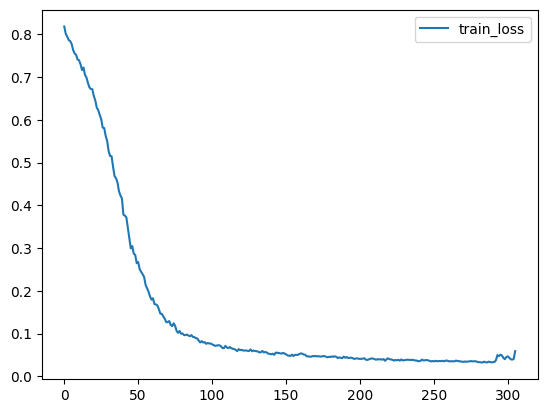

In [93]:
plt.plot(history.history['loss'])
plt.legend(['train_loss'])
plt.show()

In [94]:
#Prediction basée sur les 12 derniers tirages
last_twelve = df.tail(window_length) # on recupere les derniers tirages
scaler = StandardScaler().fit(df.values)
scaled_to_predict = scaler.transform(last_twelve)
scaled_predicted_output_1 = model.predict(np.array([scaled_to_predict]), )

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


1/1 [==============================] - 1s 1s/step


In [95]:
#prediction
tom = df.tail(window_length).iloc[:,0:8] # 
#print(tom)
scaler = StandardScaler().fit(df.iloc[:,0:8])
scaled_to_predict = scaler.transform(tom)
#print(scaled_to_predict)
print(scaler.inverse_transform(scaled_predicted_output_1).astype(int)[:])

[[15 17 30 31 33 40 48 13]]
